# São Paulo Real State - Sale/Rent - April 2019

## Catia Michele Tondolo

In [171]:
import numpy as np
import pandas as pd

import seaborn as sns
import re
import patsy
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats

from plotnine import *
from siuba import *

import timeit


sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

np.warnings.filterwarnings('ignore')

### Dados

In [172]:
import pandas as pd

SPproperties = pd.read_csv('./datasets/sao-paulo-properties-april-2019.csv')

In [173]:
SPproperties.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [174]:
# limpando distrito e criando cidade

SPproperties[['District','City']] = SPproperties['District'].str.split('/', expand = True)

### Renoameando variáveis

In [175]:
SPproperties.columns = ['Preço', 'Condomínio','Tamanho','Quartos','Banheiros','Suítes','Estacionamento','Elevador','Mobiliado','Piscina','Novo','Distrito','Tipo Negócio','Tipo Propriedade','Latitude','Longitude','Cidade']


In [176]:
SPproperties.head()

,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Estacionamento,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo Negócio,Tipo Propriedade,Latitude,Longitude,Cidade
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436,São Paulo


Temos:
- preço
- condomínio
- tamanho
- quartos
- banheiros
- suites
- estacionamento
- elevador
- mobiliada
- piscina
- novo
- distrito
- latitude
- longitude
- tipo de negócio
- tipo de propriedade

### Estrutura

In [177]:
SPproperties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Preço             13640 non-null  int64  
 1   Condomínio        13640 non-null  int64  
 2   Tamanho           13640 non-null  int64  
 3   Quartos           13640 non-null  int64  
 4   Banheiros         13640 non-null  int64  
 5   Suítes            13640 non-null  int64  
 6   Estacionamento    13640 non-null  int64  
 7   Elevador          13640 non-null  int64  
 8   Mobiliado         13640 non-null  int64  
 9   Piscina           13640 non-null  int64  
 10  Novo              13640 non-null  int64  
 11  Distrito          13640 non-null  object 
 12  Tipo Negócio      13640 non-null  object 
 13  Tipo Propriedade  13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
 16  Cidade            13640 non-null  object

### Banco completo

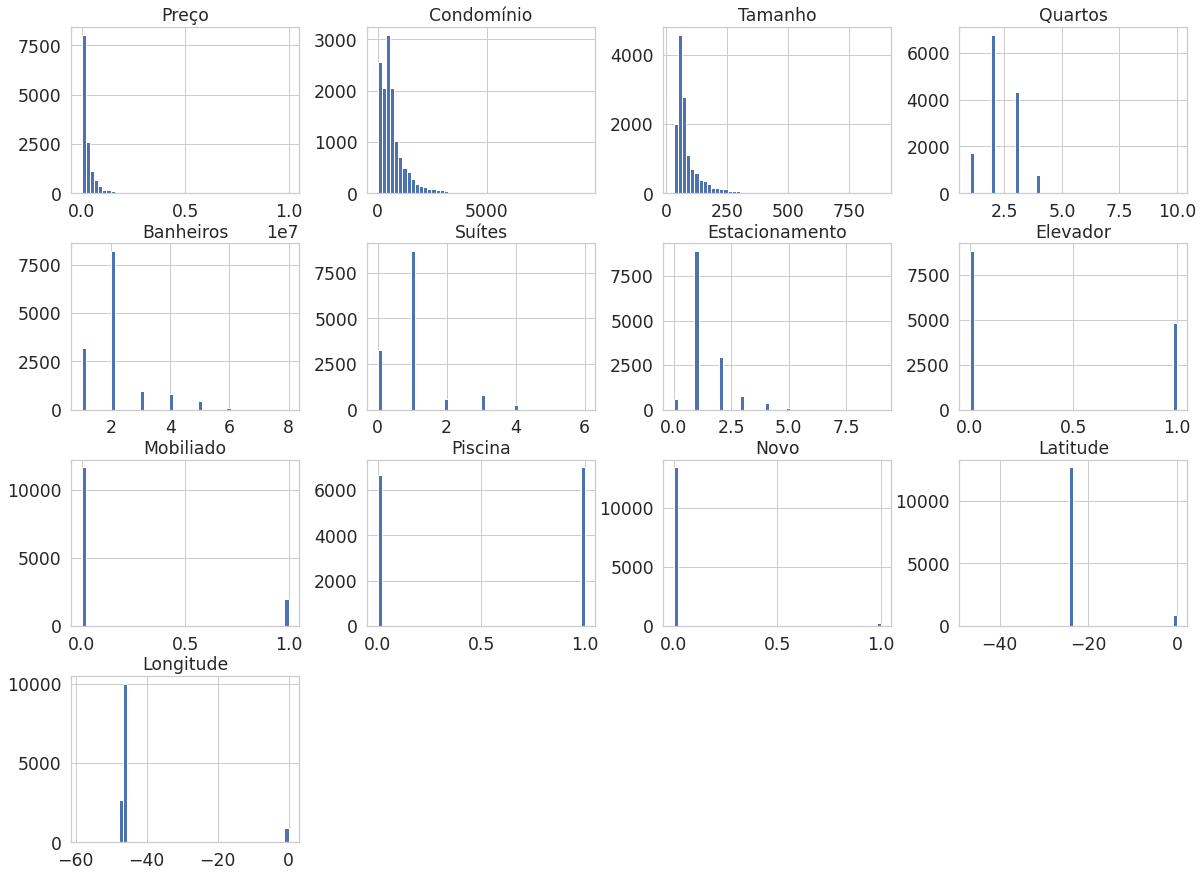

In [178]:
# plotando um histograma para cada atributo numérico do banco de dados
SPproperties.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

### Checar duplicatas

In [179]:
SPproperties.duplicated().unique()

array([False,  True])

In [180]:
pd.DataFrame({'tipos':SPproperties.dtypes, 'missing':SPproperties.isna().sum()}) # aqui podemos ver os tipos

,tipos,missing
Preço,int64,0
Condomínio,int64,0
Tamanho,int64,0
Quartos,int64,0
Banheiros,int64,0
Suítes,int64,0
Estacionamento,int64,0
Elevador,int64,0
Mobiliado,int64,0
Piscina,int64,0


Banco de dados completos não sendo necessário tratamento de valores ausentes.

<AxesSubplot:xlabel='Preço', ylabel='Count'>

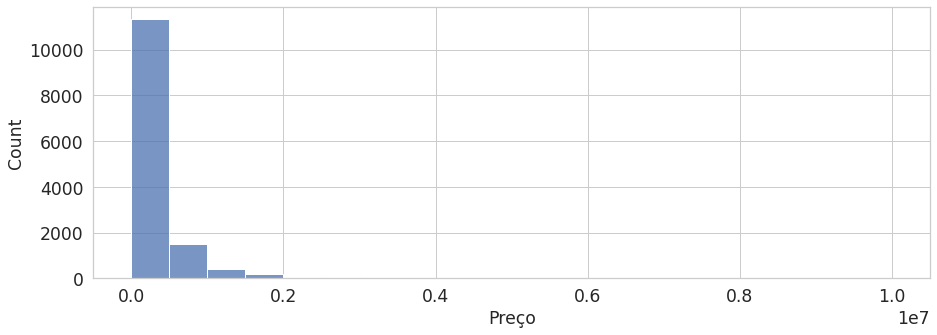

In [181]:
sns.histplot(data = SPproperties, x = 'Preço', bins = 20)

In [182]:
SPproperties['Tipo Negócio'].value_counts()

rent    7228
sale    6412
Name: Tipo Negócio, dtype: int64

In [183]:
SPproperties['Tipo Propriedade'].value_counts()

apartment    13640
Name: Tipo Propriedade, dtype: int64

In [184]:
# tipo de negócio
SPproperties['Tipo Negócio'] = SPproperties['Tipo Negócio'].map({'rent':'Aluguel', 'sale':'Vender'})

In [185]:
SPproperties['Tipo Propriedade'] = SPproperties['Tipo Propriedade'].map({'apartment':'Apartamento'})

Temos dois tipos de apartamento:
- alugar 
- vender

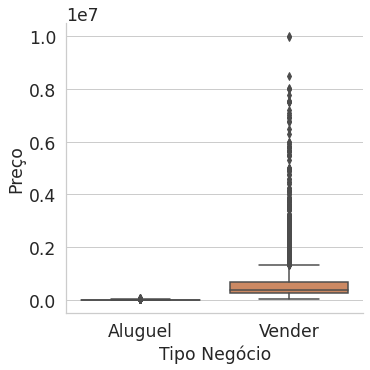

In [186]:
ax = sns.catplot(x = 'Tipo Negócio', y = 'Preço', kind = 'box',
                data = SPproperties)

Plotando preço x tamanho para venda

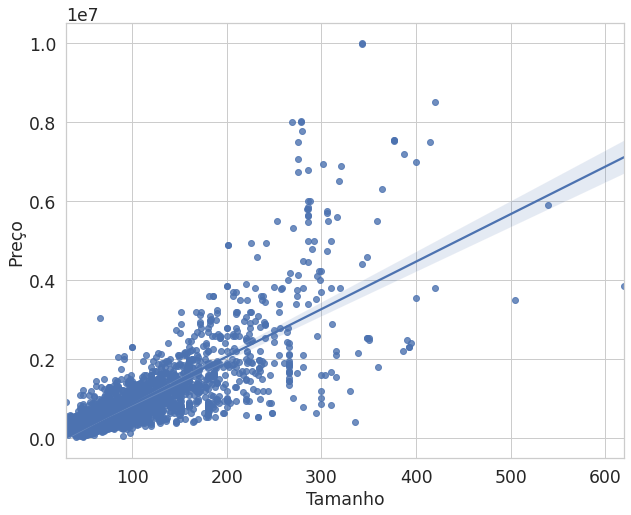

In [187]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Tamanho', y = 'Preço', data = SPproperties[SPproperties['Tipo Negócio'] == 'Vender'])

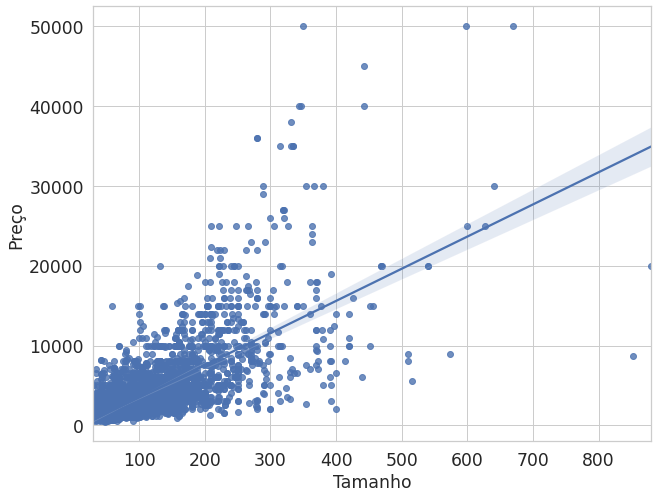

In [188]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Tamanho', y = 'Preço', data = SPproperties[SPproperties['Tipo Negócio'] == 'Aluguel'])

Plotando preço x tamanho para aluguel

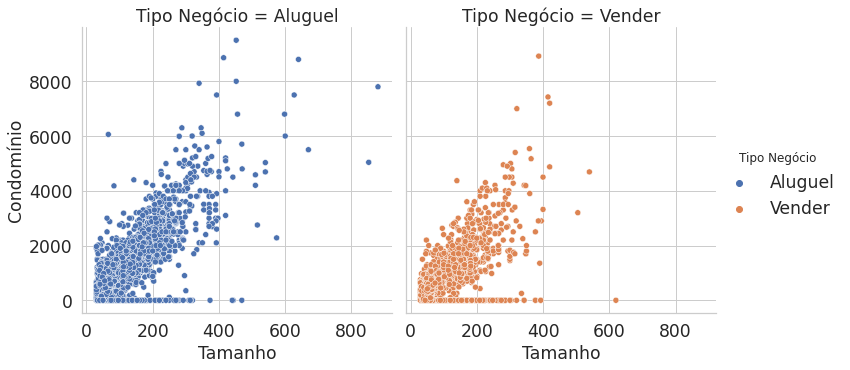

In [189]:
sns.relplot(x = 'Tamanho', y = 'Condomínio', data = SPproperties, hue = 'Tipo Negócio', col = 'Tipo Negócio')

Nos gráficos acima podemos perceber uma tendência linear nas variáveis analisadas.

In [190]:
SPproperties['Quartosf'] = SPproperties['Quartos'].astype('category',copy=False)

In [193]:
SPproperties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Preço             13640 non-null  int64   
 1   Condomínio        13640 non-null  int64   
 2   Tamanho           13640 non-null  int64   
 3   Quartos           13640 non-null  int64   
 4   Banheiros         13640 non-null  int64   
 5   Suítes            13640 non-null  int64   
 6   Estacionamento    13640 non-null  int64   
 7   Elevador          13640 non-null  int64   
 8   Mobiliado         13640 non-null  int64   
 9   Piscina           13640 non-null  int64   
 10  Novo              13640 non-null  int64   
 11  Distrito          13640 non-null  object  
 12  Tipo Negócio      13640 non-null  object  
 13  Tipo Propriedade  13640 non-null  object  
 14  Latitude          13640 non-null  float64 
 15  Longitude         13640 non-null  float64 
 16  Cidade            1364

### Dividindo os datasets

In [194]:
SPproperties_Venda = SPproperties[SPproperties['Tipo Negócio'] == 'Vender']
SPproperties_Aluguel = SPproperties[SPproperties['Tipo Negócio'] == 'Aluguel']

A separação da base de dados faz sentido para a modelagem pelo intervalo de valores de preços assumidos pelos tipos de negócio.

Text(0.5, 0, 'Banheiros')

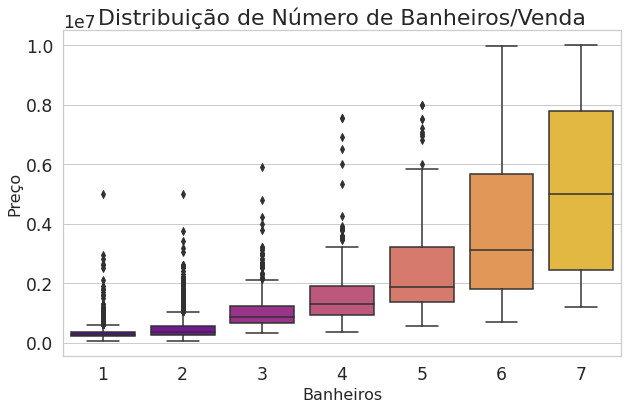

In [195]:
plt.figure(figsize =(10,6))
ax = sns.boxplot(x = 'Banheiros', y = 'Preço', data = SPproperties_Venda,
                palette = 'plasma')

ax.set_title('Distribuição de Número de Banheiros/Venda', fontsize = 22)
ax.set_ylabel('Preço', fontsize = 16)
ax.set_xlabel('Banheiros', fontsize = 16)


Text(0.5, 0, 'Banheiros')

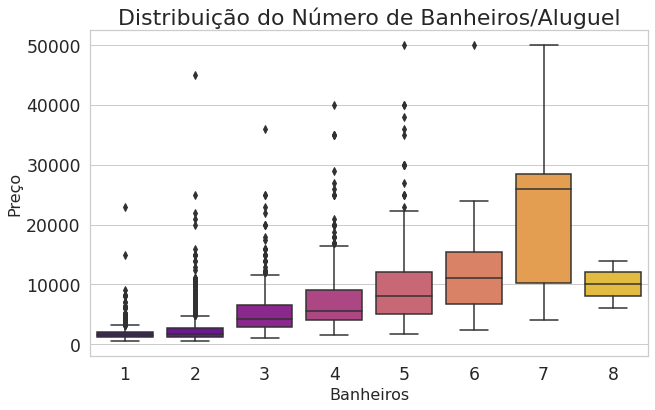

In [196]:
plt.figure(figsize =(10,6))
ax = sns.boxplot(x = 'Banheiros', y = 'Preço', data = SPproperties_Aluguel,
                palette = 'plasma')

ax.set_title('Distribuição do Número de Banheiros/Aluguel', fontsize = 22)
ax.set_ylabel('Preço', fontsize = 16)
ax.set_xlabel('Banheiros', fontsize = 16)

Text(0.5, 0, 'Quartos')

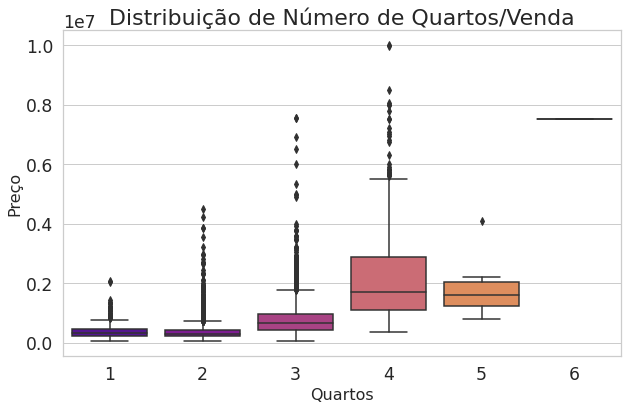

In [197]:
plt.figure(figsize =(10,6))
ax = sns.boxplot(x = 'Quartos', y = 'Preço', data = SPproperties_Venda,
                palette = 'plasma')

ax.set_title('Distribuição de Número de Quartos/Venda', fontsize = 22)
ax.set_ylabel('Preço', fontsize = 16)
ax.set_xlabel('Quartos', fontsize = 16)

Text(0.5, 0, 'Quartos')

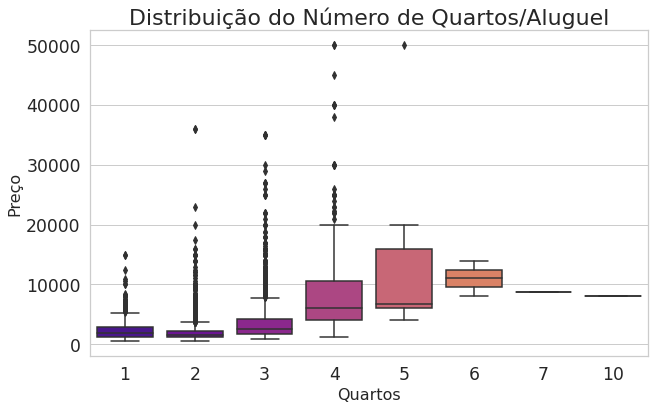

In [198]:
plt.figure(figsize =(10,6))
ax = sns.boxplot(x = 'Quartos', y = 'Preço', data = SPproperties_Aluguel,
                palette = 'plasma')

ax.set_title('Distribuição do Número de Quartos/Aluguel', fontsize = 22)
ax.set_ylabel('Preço', fontsize = 16)
ax.set_xlabel('Quartos', fontsize = 16)

#### Preço médio no distrito

Venda:

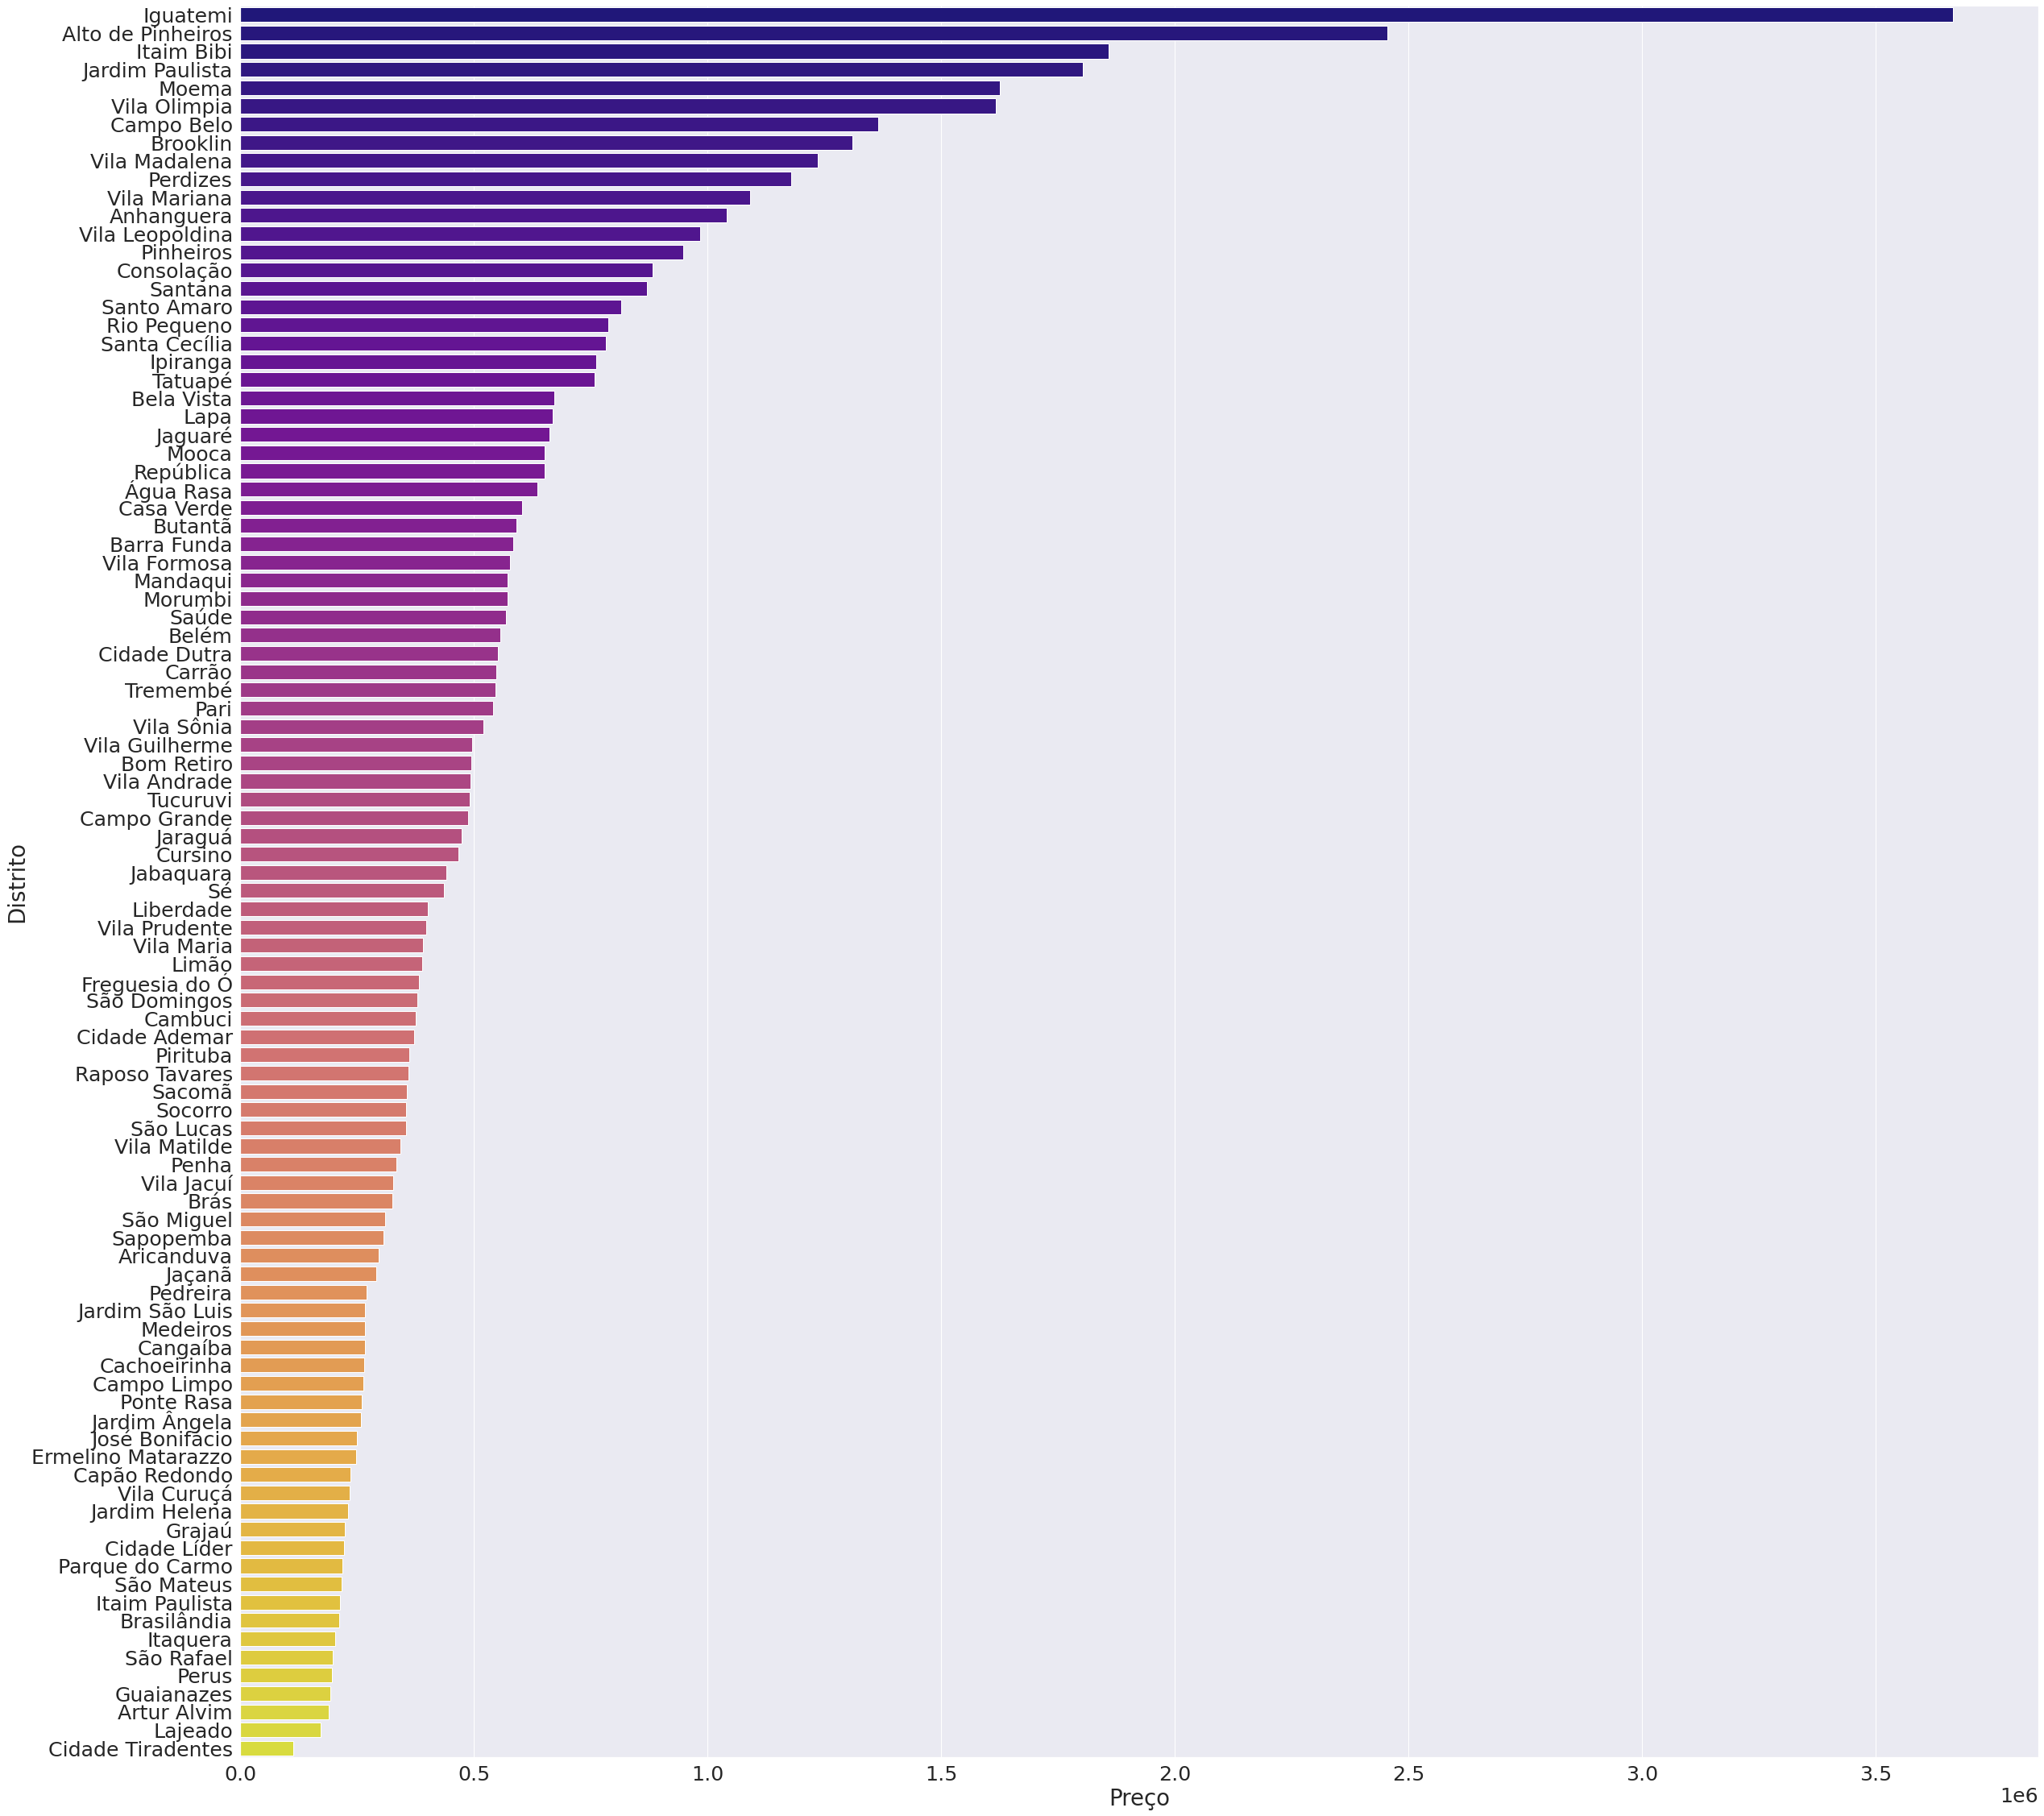

In [199]:
grouped = SPproperties_Venda.groupby('Distrito')['Preço'].mean().reset_index()
grouped = grouped.sort_values(by = 'Preço',ascending = False)
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.3)
ax = sns.barplot(x='Preço', y='Distrito', data= grouped,palette = 'plasma')


Aluguel:

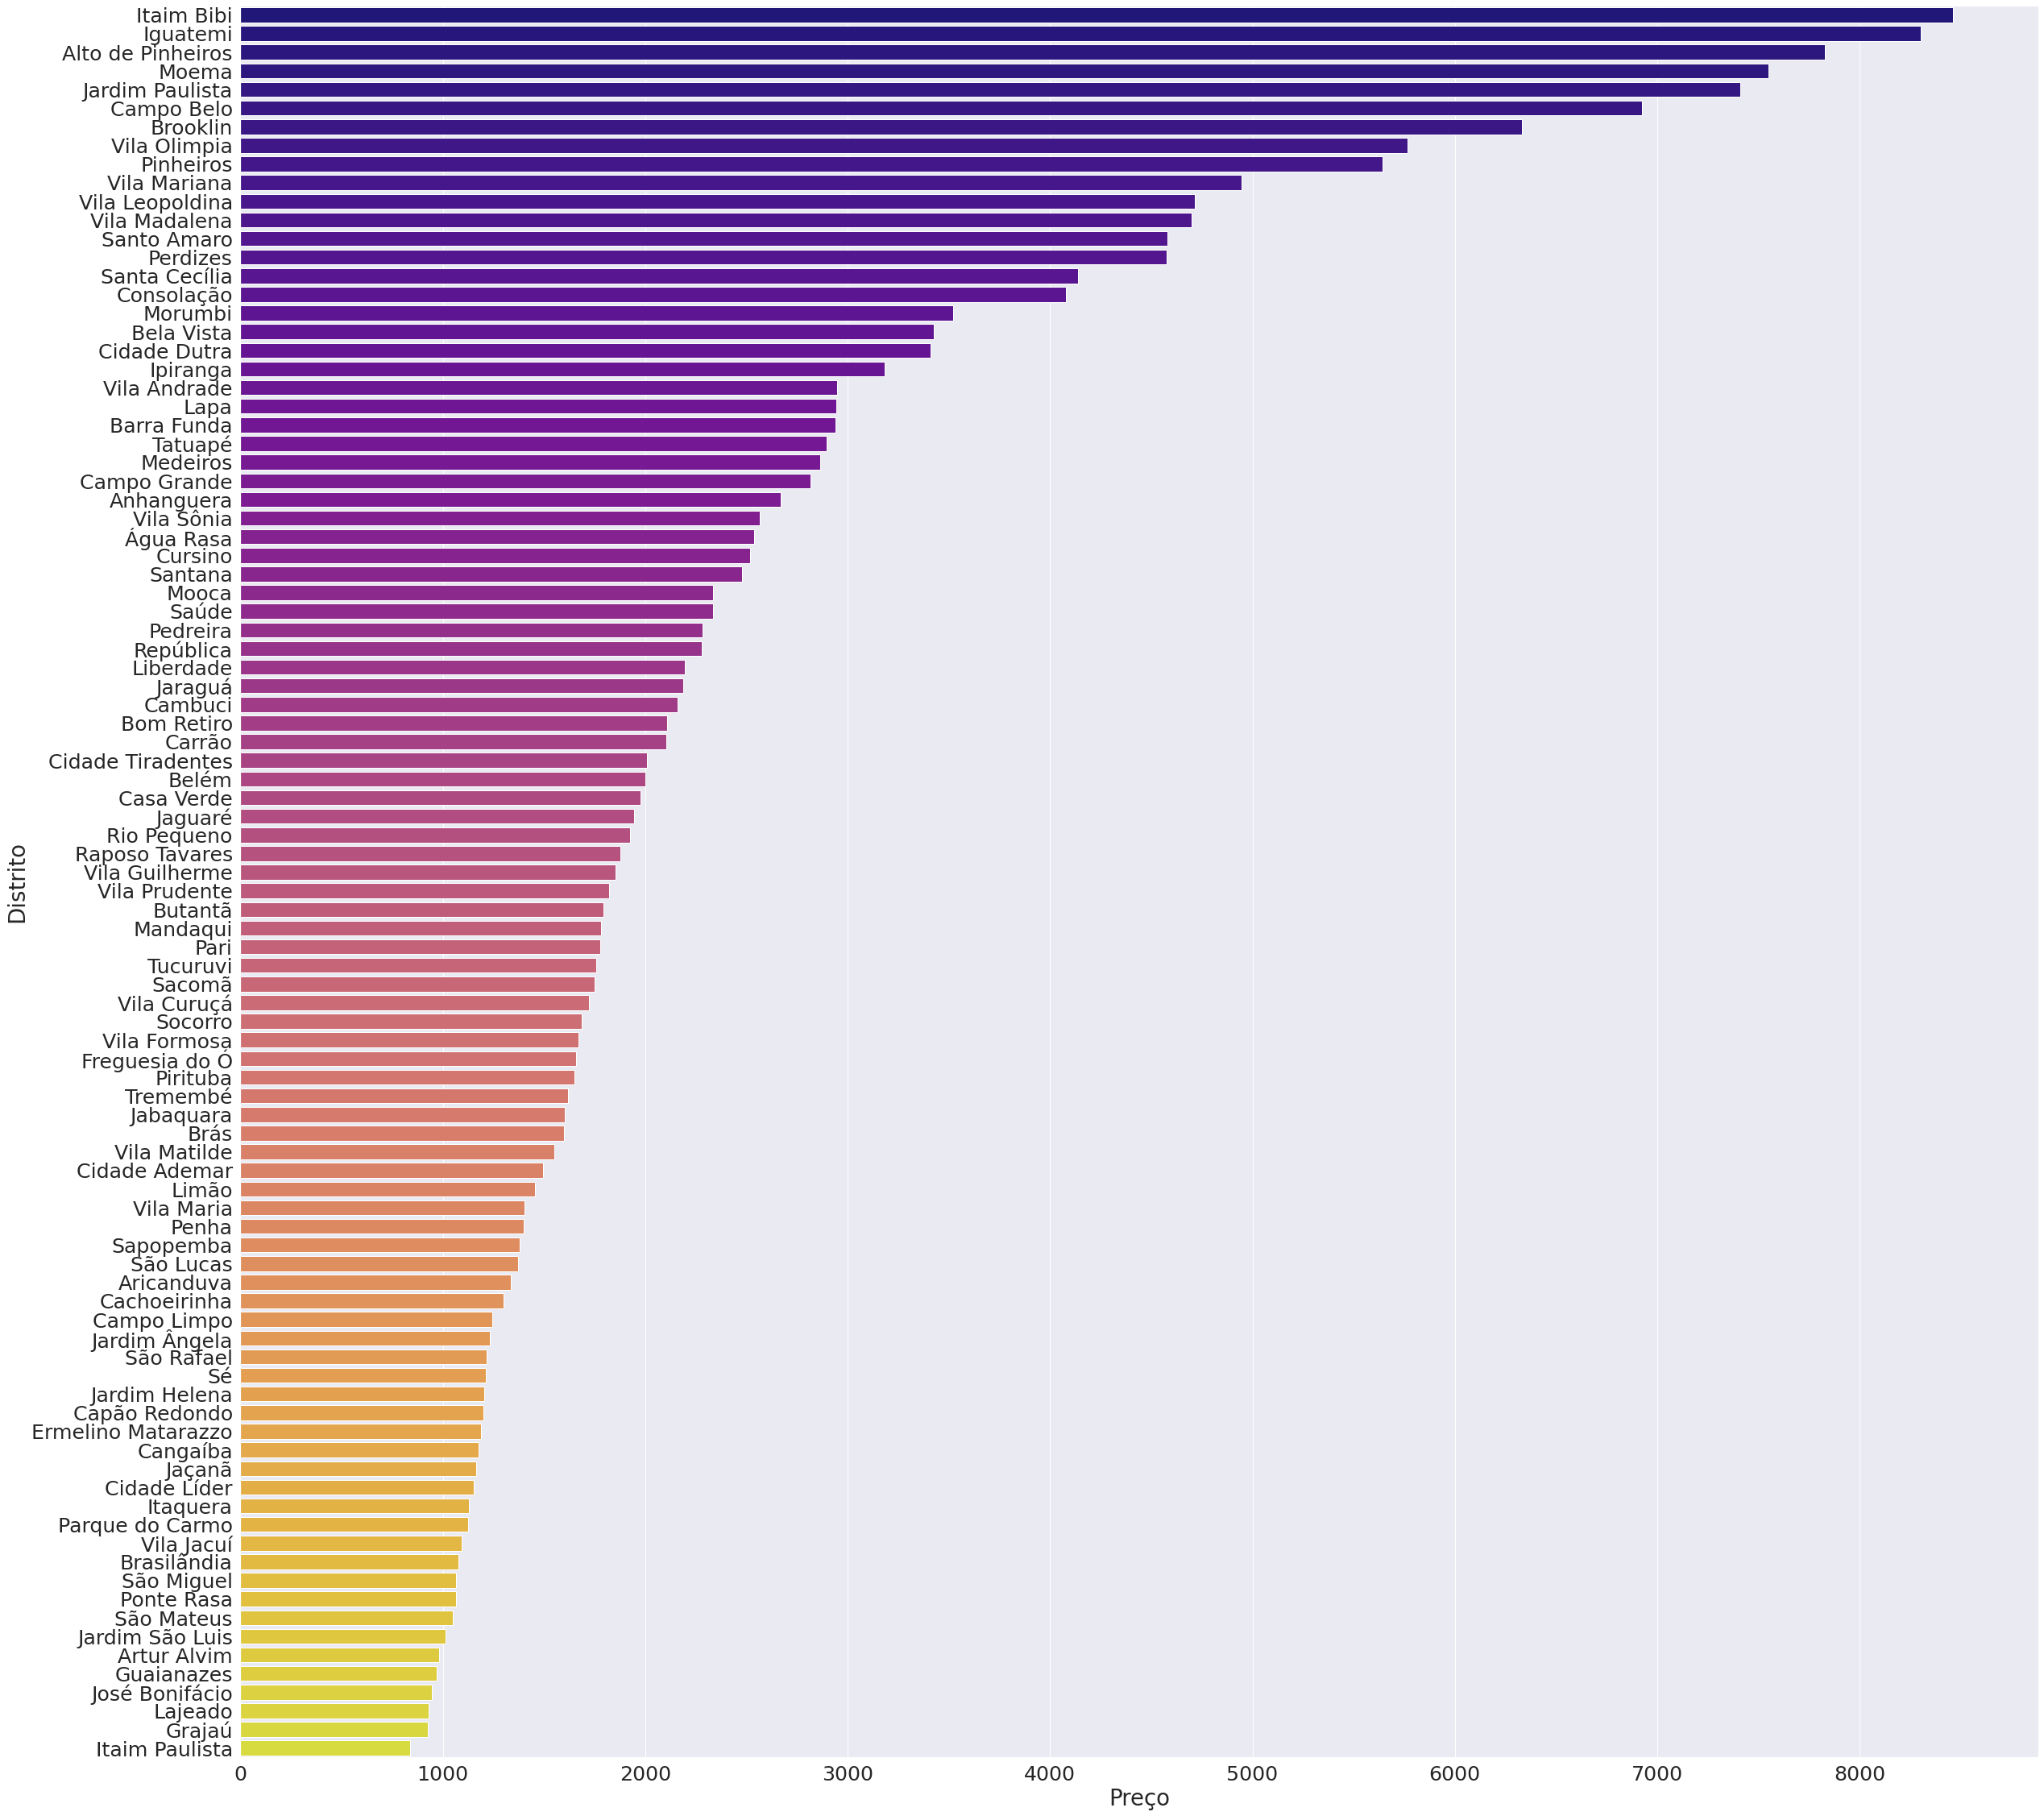

In [200]:
grouped = SPproperties_Aluguel.groupby('Distrito')['Preço'].mean().reset_index()
grouped = grouped.sort_values(by = 'Preço',ascending = False)
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.3)
ax = sns.barplot(x='Preço', y='Distrito', data= grouped,palette = 'plasma')


In [201]:
sns.set(font_scale = 1)

#### Criar os bancos de treino e teste para venda e aluguel dos apartamentos

In [202]:
from sklearn.model_selection import train_test_split

# venda
SPpropertiesV_train, SPpropertiesV_test = train_test_split(SPproperties_Venda, test_size = 0.2, shuffle=False)

# aluguel
SPpropertiesA_train, SPpropertiesA_test = train_test_split(SPproperties_Aluguel, test_size = 0.2, shuffle=False)

In [203]:
SPpropertiesV_train.head()

,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Estacionamento,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo Negócio,Tipo Propriedade,Latitude,Longitude,Cidade,Quartosf
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena,Vender,Apartamento,-23.552129,-46.692244,São Paulo,1
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena,Vender,Apartamento,-23.551613,-46.699106,São Paulo,4
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena,Vender,Apartamento,-23.547687,-46.692594,São Paulo,2
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena,Vender,Apartamento,-23.552590,-46.691104,São Paulo,3
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena,Vender,Apartamento,-23.553087,-46.697890,São Paulo,2


In [204]:
SPpropertiesV_train.shape

(5129, 18)

In [205]:
SPpropertiesV_test.head()

,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Estacionamento,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo Negócio,Tipo Propriedade,Latitude,Longitude,Cidade,Quartosf
12357,650000,700,77,3,2,1,2,0,0,1,0,Vila Guilherme,Vender,Apartamento,0.000000,0.000000,São Paulo,3
12358,410000,661,60,2,2,1,2,0,0,1,0,Vila Guilherme,Vender,Apartamento,0.000000,0.000000,São Paulo,2
12359,290000,282,58,2,1,0,1,0,0,0,0,Vila Guilherme,Vender,Apartamento,0.000000,0.000000,São Paulo,2
12360,450000,0,68,2,1,0,2,0,0,0,0,Vila Guilherme,Vender,Apartamento,-23.504154,-46.606132,São Paulo,2
12361,590000,858,79,3,2,1,2,0,0,1,0,Vila Guilherme,Vender,Apartamento,-23.504776,-46.606153,São Paulo,3


In [206]:
SPpropertiesV_test.shape

(1283, 18)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

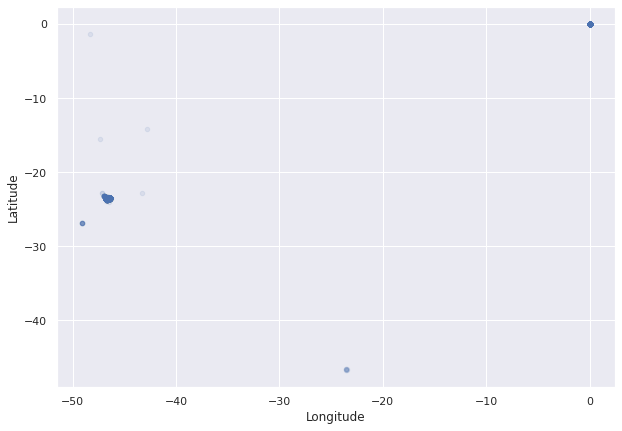

In [207]:
SPpropertiesV_train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7))

#### Correlações

Venda:

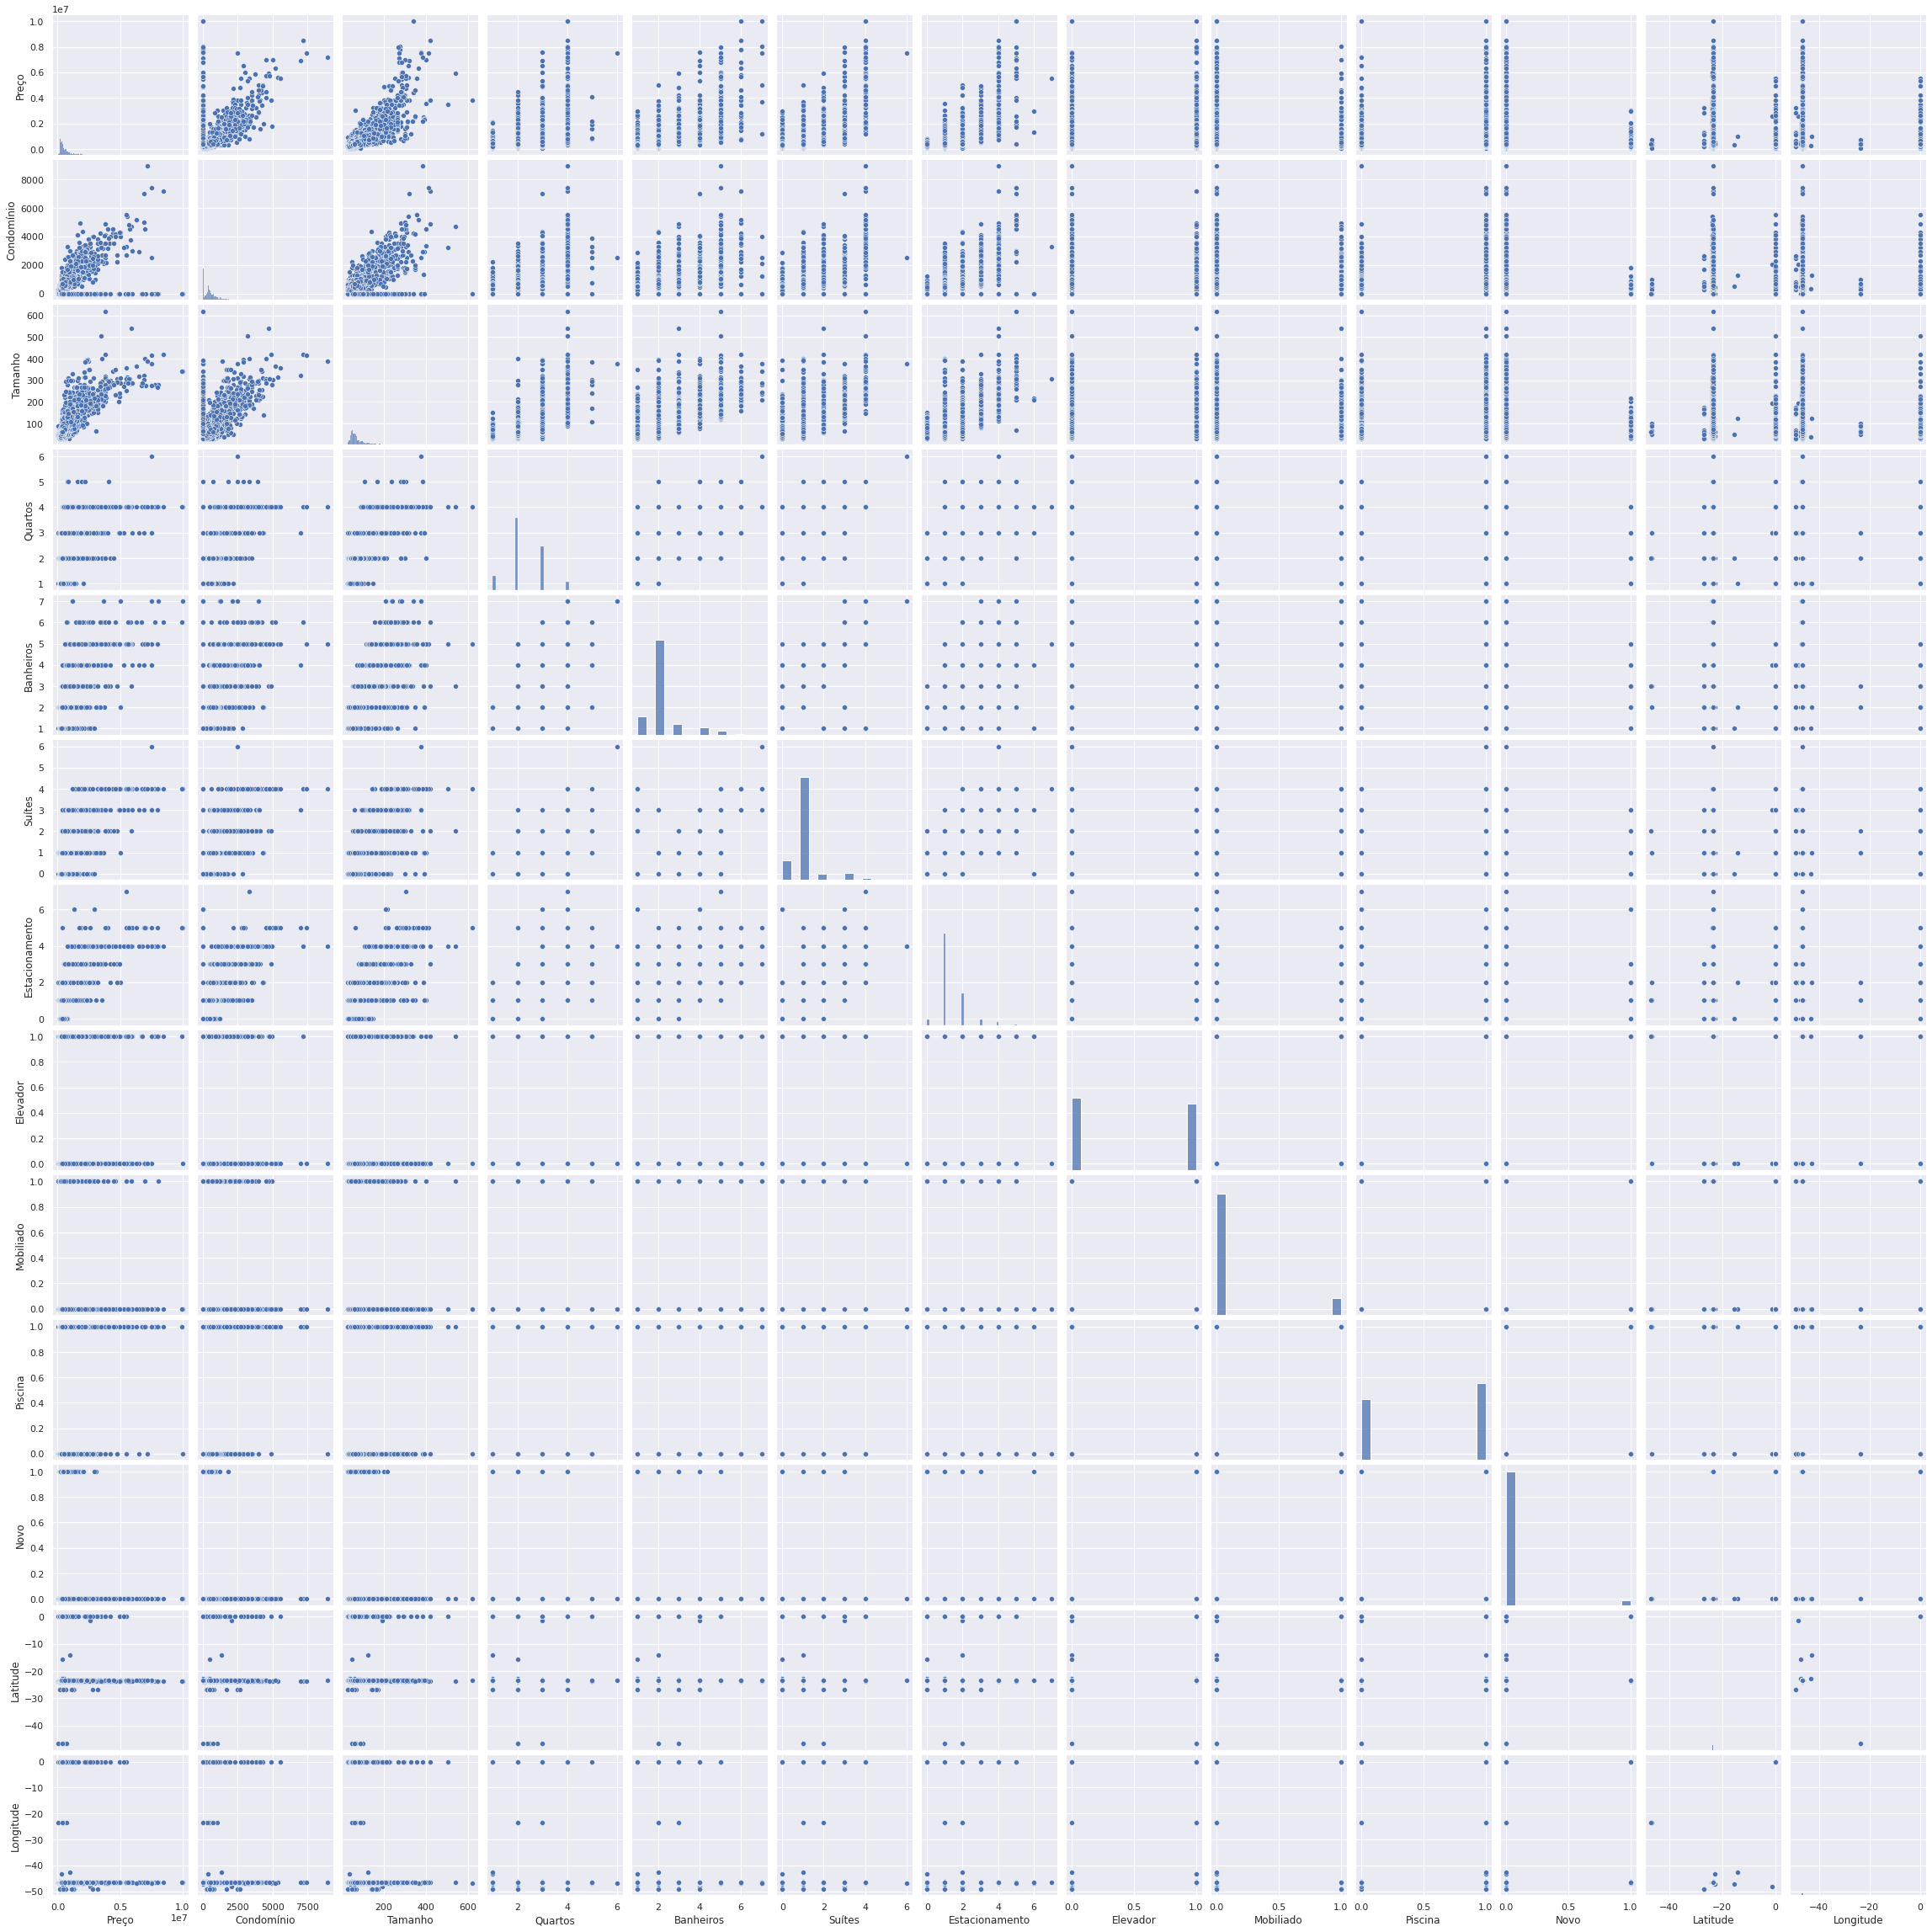

In [208]:
sns.pairplot(data=SPpropertiesV_train)

Aluguel:

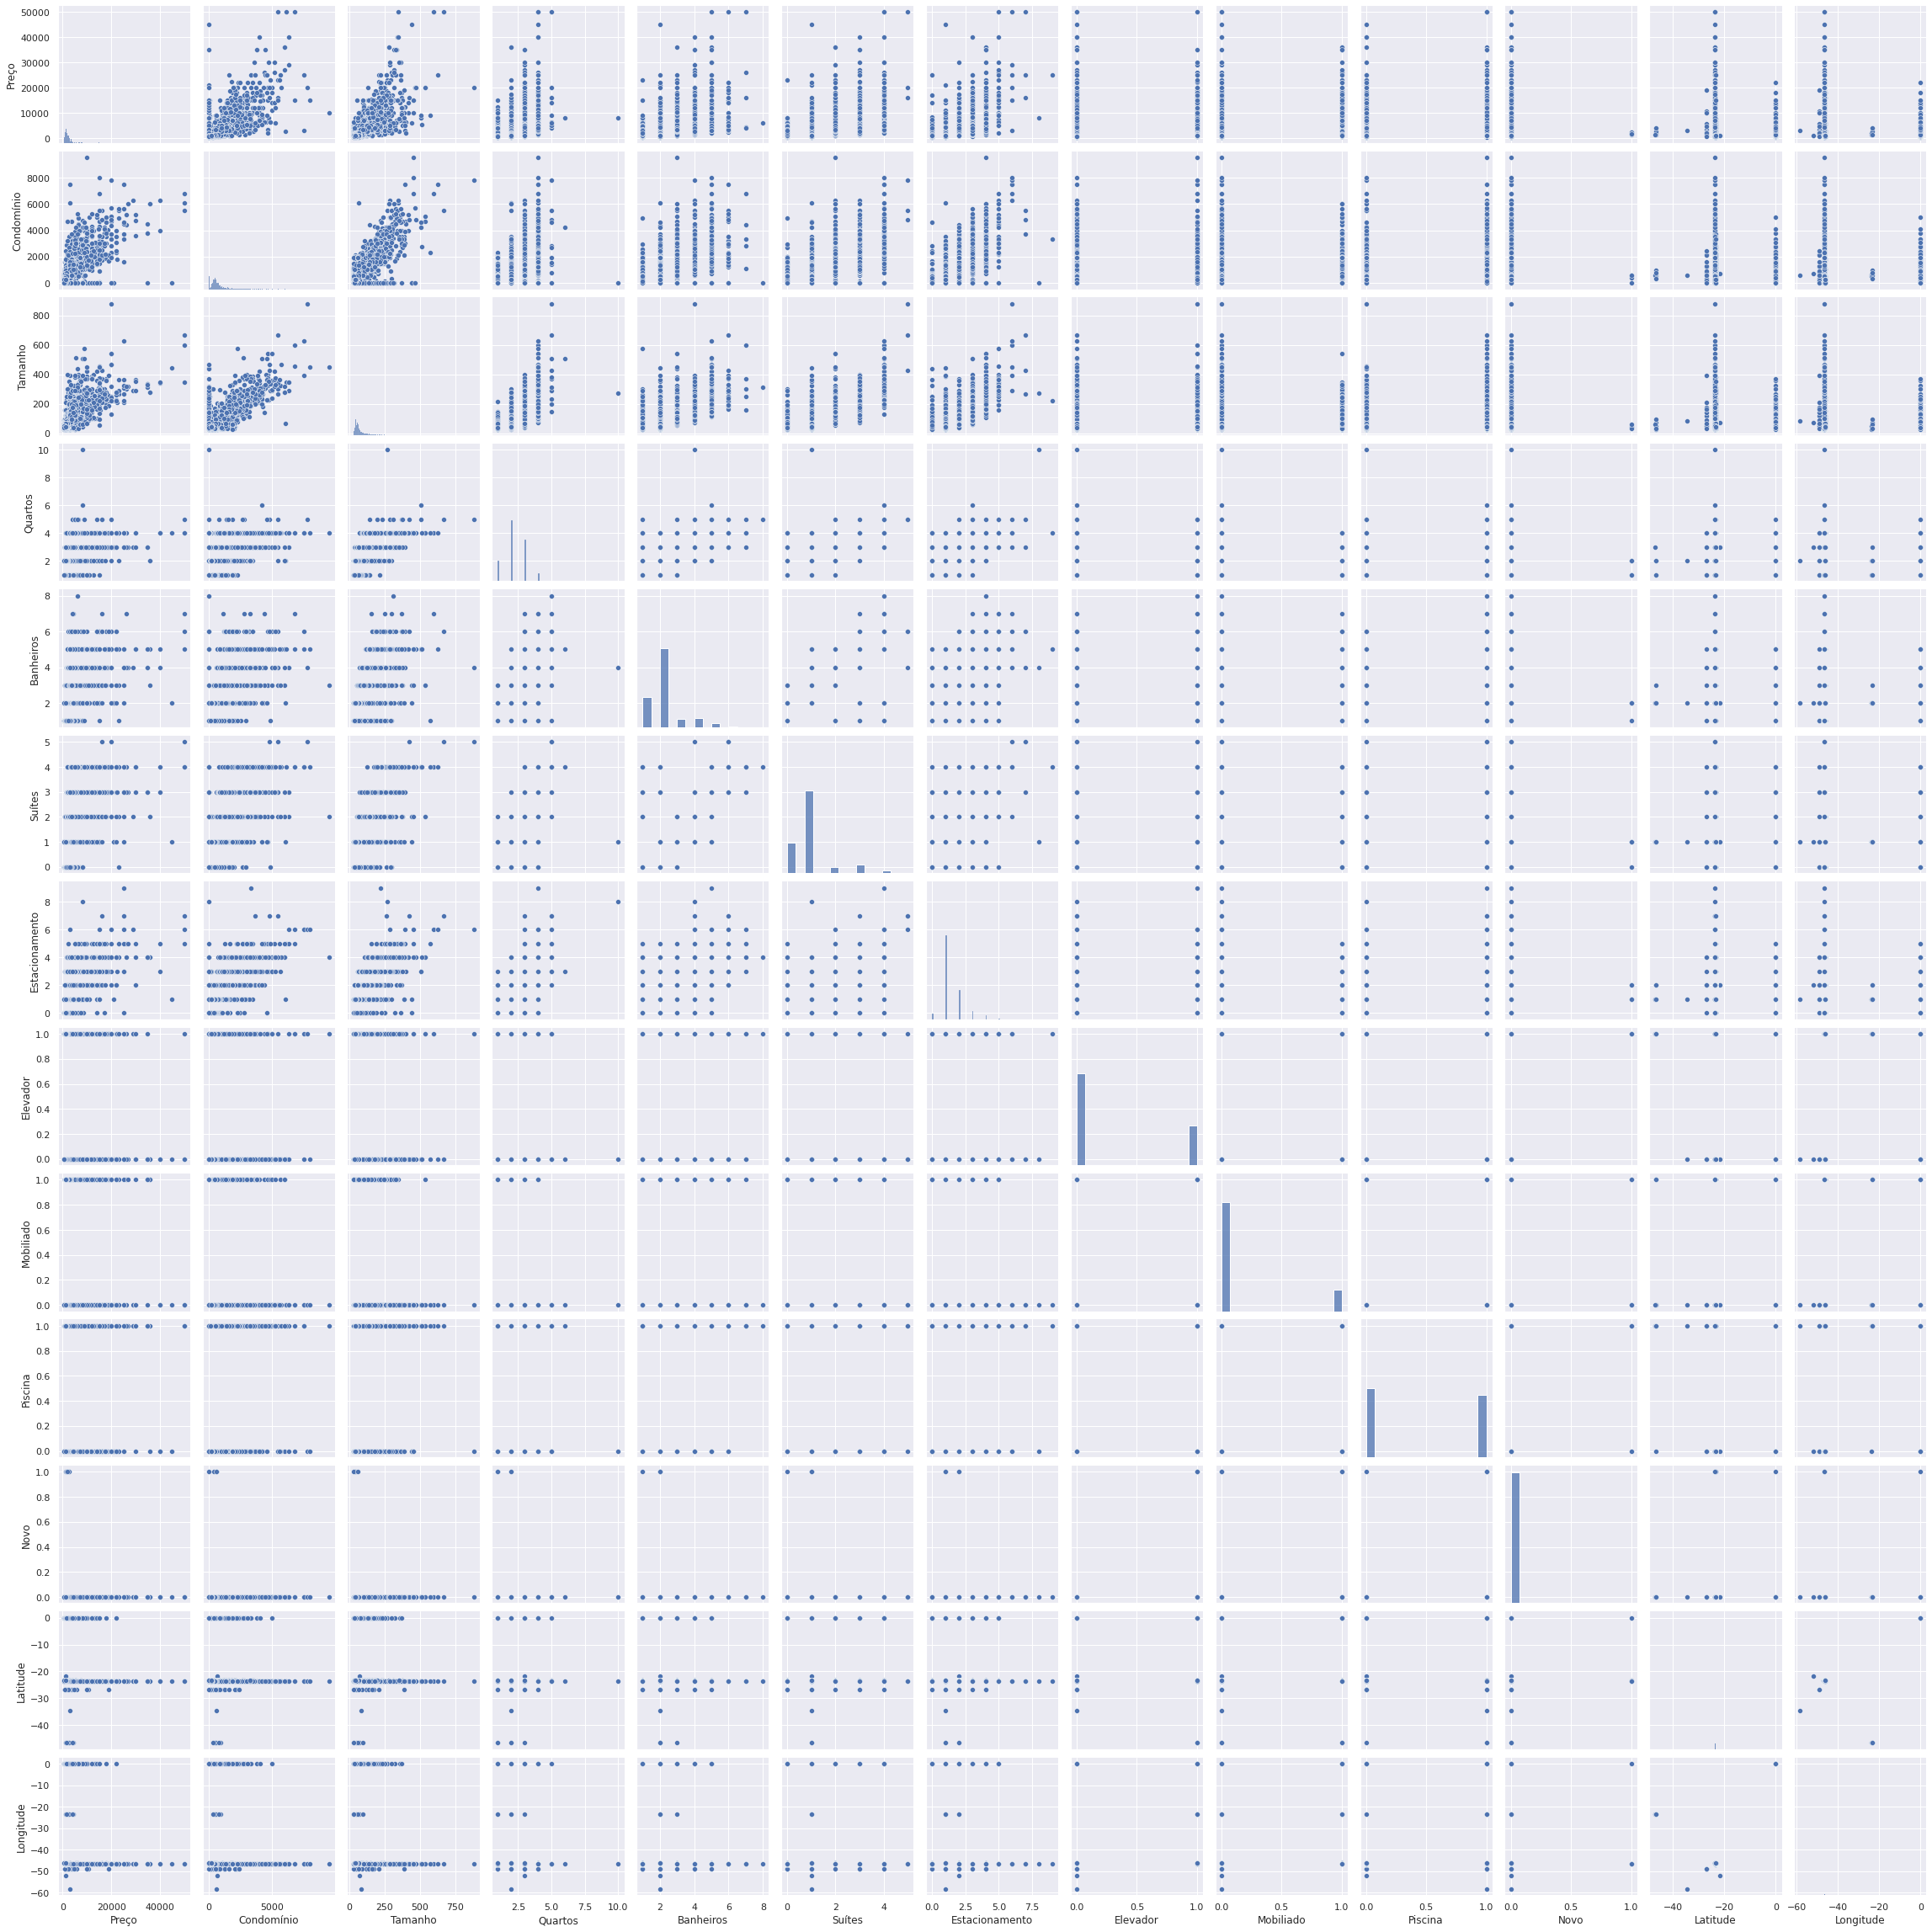

In [209]:
sns.pairplot(data=SPpropertiesA_train)

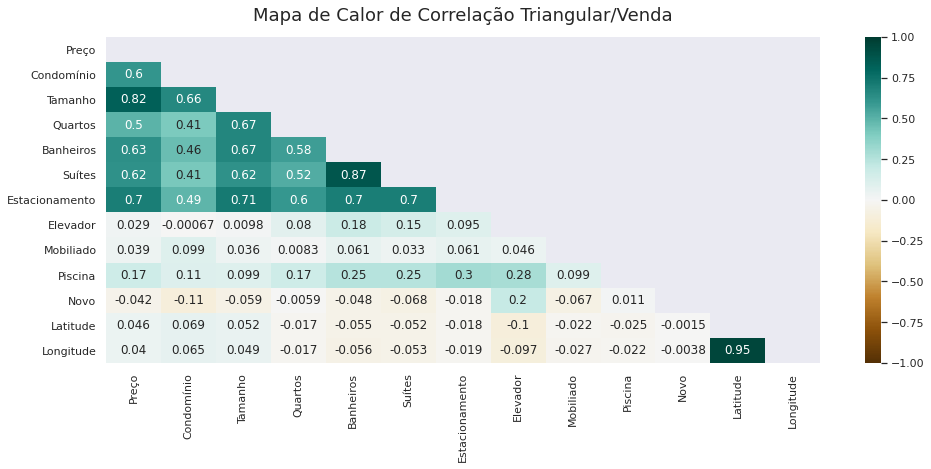

In [211]:
# plotando os coeficientes de correlação como mapa de calor
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(SPpropertiesV_train.corr(), dtype=np.bool))  # cria uma matriz triangular baseada na matriz de correlação do pandas

heatmap = sns.heatmap(SPpropertiesV_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Calor de Correlação Triangular/Venda', fontdict={'fontsize':18}, pad=16);

Preço x condomínio x quartos x tamanho x banheiros x suites x estacionamento

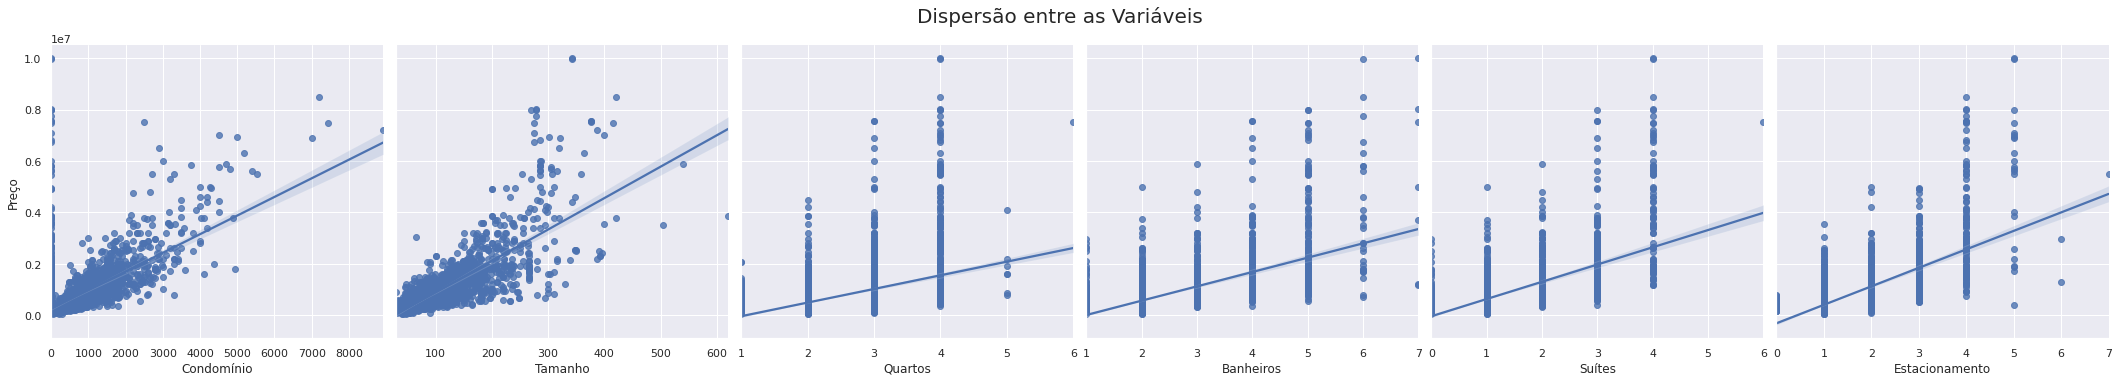

In [212]:
ax = sns.pairplot(SPpropertiesV_train, y_vars = 'Preço', x_vars = ['Condomínio', 'Tamanho', 'Quartos','Banheiros','Suítes','Estacionamento'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax 

Variáveis mais correlacionadas

<Figure size 1080x576 with 0 Axes>

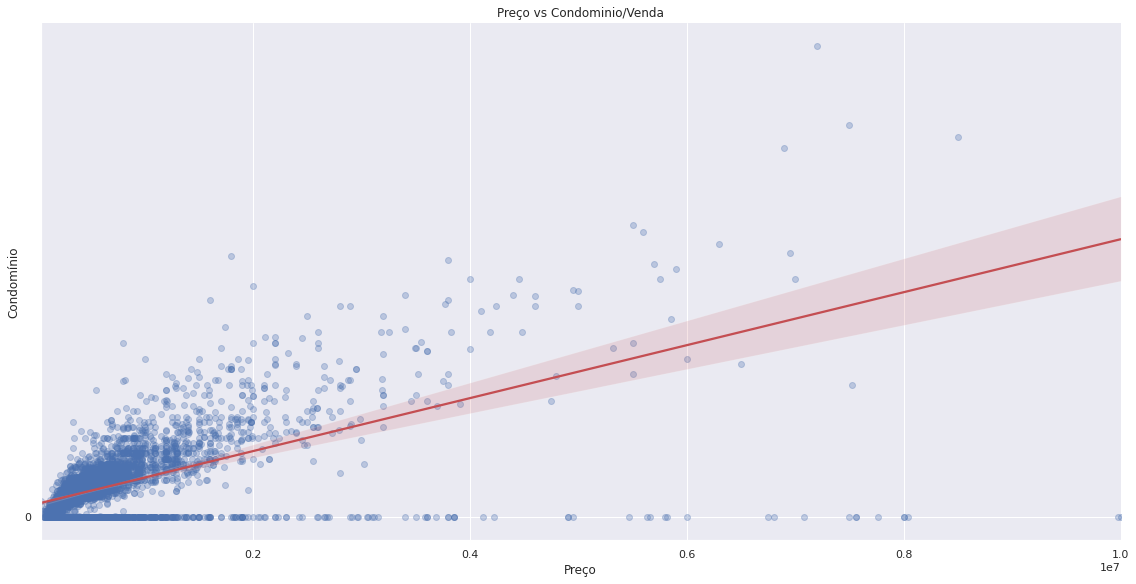

In [213]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=SPpropertiesV_train, x="Preço", y="Condomínio", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 7, 25))
plt.grid(True)
plt.title('Preço vs Condominio/Venda')
display()

<Figure size 1080x576 with 0 Axes>

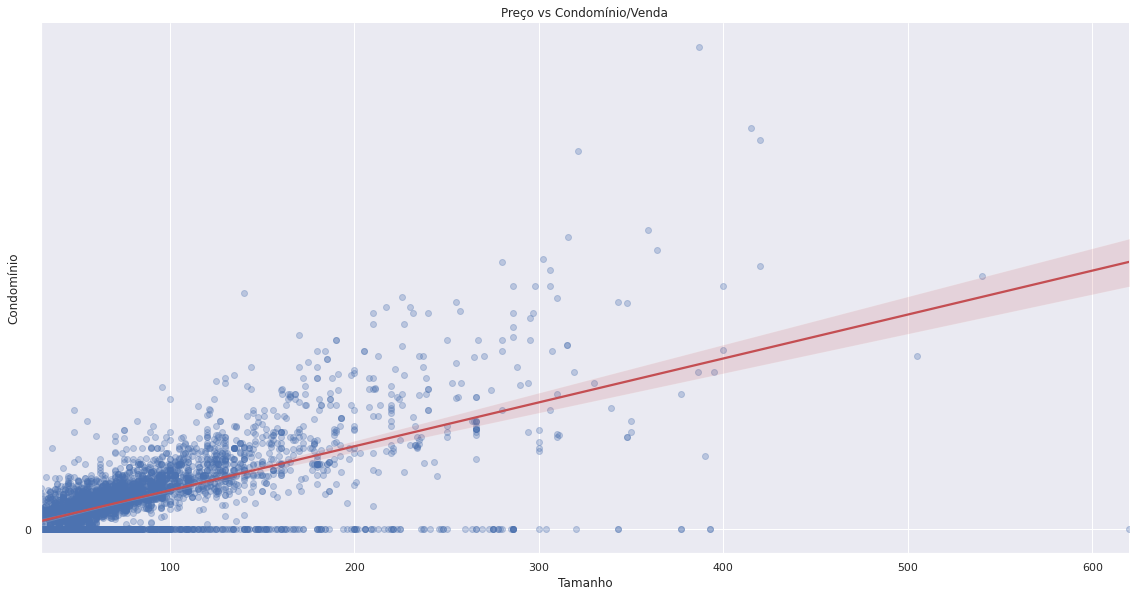

In [214]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=SPpropertiesV_train, x="Tamanho", y="Condomínio", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 7, 25))
plt.grid(True)
plt.title('Preço vs Condomínio/Venda')
display()

Aluguel:

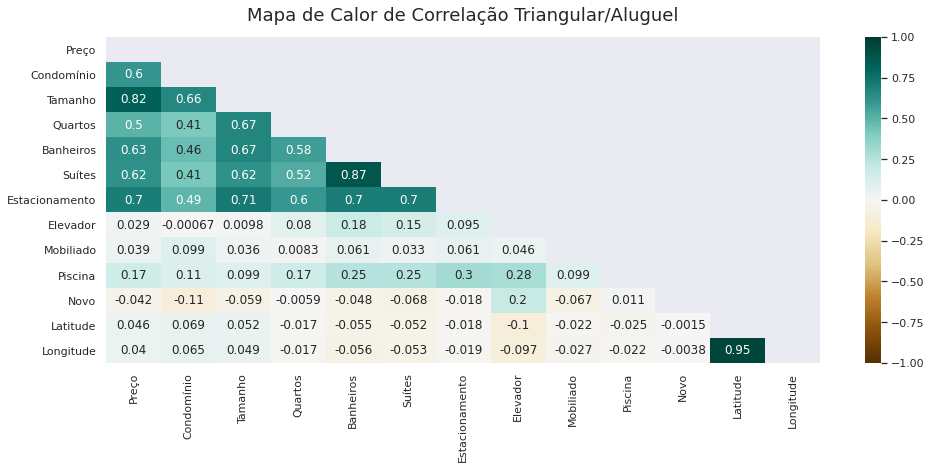

In [215]:
# plotando os coeficientes de correlação como mapa de calor
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(SPpropertiesA_train.corr(), dtype=np.bool))  # cria uma matriz triangular baseada na matriz de correlação do pandas

heatmap = sns.heatmap(SPpropertiesV_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Calor de Correlação Triangular/Aluguel', fontdict={'fontsize':18}, pad=16);

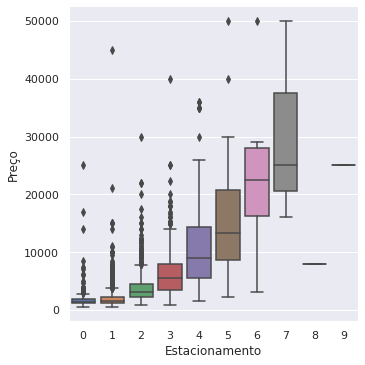

In [216]:
sns.catplot(x='Estacionamento', y='Preço', kind = 'box', data=SPpropertiesA_train)

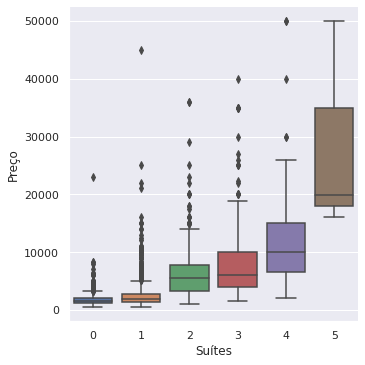

In [217]:
sns.catplot(x='Suítes', y='Preço', kind = 'box', data=SPpropertiesA_train)

Preço x condomínio x quartos x tamanho x banheiros x suites x estacionamento

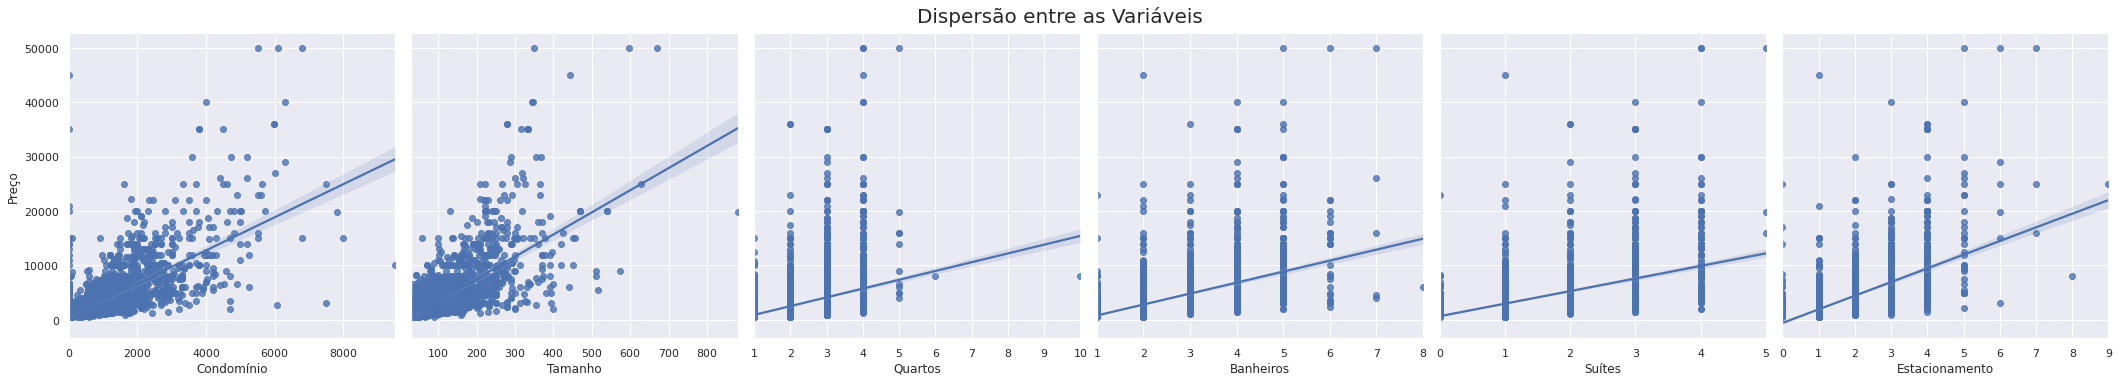

In [218]:
ax = sns.pairplot(SPpropertiesA_train, y_vars = 'Preço', x_vars = ['Condomínio', 'Tamanho', 'Quartos','Banheiros','Suítes','Estacionamento'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax 

#### Modelagem a partir dos insights das análises anteriores

Venda:

In [219]:
yv = SPpropertiesV_train['Preço']

ya = SPpropertiesA_train['Preço']

In [265]:
Xv = SPpropertiesV_train[['Tamanho', 'Condomínio', 'Quartos','Banheiros','Suítes','Estacionamento']]

Xa = SPpropertiesA_train[['Tamanho', 'Condomínio', 'Quartos','Banheiros','Suítes','Estacionamento']]

In [266]:
import statsmodels.api as sm

In [267]:
Xv_const = sm.add_constant(Xv)
Xv


,Tamanho,Condomínio,Quartos,Banheiros,Suítes,Estacionamento
4901,74,1000,1,2,1,2
4902,164,2400,4,5,2,3
4903,70,700,2,2,1,1
4904,155,1580,3,5,3,2
4905,56,900,2,2,1,2
...,...,...,...,...,...,...
12352,63,390,2,2,1,1
12353,62,550,3,2,1,1
12354,62,430,2,2,1,1
12355,73,550,3,2,1,2


In [268]:
Xa_const = sm.add_constant(Xa)
Xa

,Tamanho,Condomínio,Quartos,Banheiros,Suítes,Estacionamento
0,47,220,2,2,1,1
1,45,148,2,2,1,1
2,48,100,2,2,1,1
3,48,200,2,2,1,1
4,55,410,2,2,1,1
...,...,...,...,...,...,...
9673,41,159,2,2,1,1
9674,42,240,2,2,1,1
9675,48,250,2,2,1,1
9676,38,25,1,2,1,1


In [269]:
Xv_const

,const,Tamanho,Condomínio,Quartos,Banheiros,Suítes,Estacionamento
4901,1.0,74,1000,1,2,1,2
4902,1.0,164,2400,4,5,2,3
4903,1.0,70,700,2,2,1,1
4904,1.0,155,1580,3,5,3,2
4905,1.0,56,900,2,2,1,2
...,...,...,...,...,...,...,...
12352,1.0,63,390,2,2,1,1
12353,1.0,62,550,3,2,1,1
12354,1.0,62,430,2,2,1,1
12355,1.0,73,550,3,2,1,2


In [270]:
Xa_const

,const,Tamanho,Condomínio,Quartos,Banheiros,Suítes,Estacionamento
0,1.0,47,220,2,2,1,1
1,1.0,45,148,2,2,1,1
2,1.0,48,100,2,2,1,1
3,1.0,48,200,2,2,1,1
4,1.0,55,410,2,2,1,1
...,...,...,...,...,...,...,...
9673,1.0,41,159,2,2,1,1
9674,1.0,42,240,2,2,1,1
9675,1.0,48,250,2,2,1,1
9676,1.0,38,25,1,2,1,1


In [271]:
modelo_venda = sm.OLS(yv,Xv_const, hasconst = True).fit()

In [263]:
modelo_venda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preço   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2310.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:02:21   Log-Likelihood:                -73625.
No. Observations:                5129   AIC:                         1.473e+05
Df Residuals:                    5122   BIC:                         1.473e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.105e+05   2.23e+04     -9.454      0.000   -2.54e+05   -1.67e+05
Tamanho         9712.5501    200.023     48.557      0.000    9320.420    1.01e+04
Condomínio       108.7600     11.631      9.351      0.000      85.959     131.561
Quartos        -1.778e+05    1.1e+04    -16.235      0.000   -1.99e+05   -1.56e+05
Banheiros       4662.1082    1.4e+04      0.334      0.739   -2.27e+04    3.21e+04
Suítes          1.234e+05   1.65e+04      7.499      0.000    9.11e+04    1.56e+05
Estacionamento   2.12e+05   1.22e+04     17.313      0.000    1.88e+05    2.36e+05
==============================================================================
Omnibus:                     4474.754   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           472513.101
Skew:                           3.665   Prob(JB):                         0.00
Kurtosis:                      49.447   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
modelo_aluguel = sm.OLS(ya,Xa_const, hasconst = True).fit()

In [229]:
modelo_aluguel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preço   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1448.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:45:06   Log-Likelihood:                -52714.
No. Observations:                5782   AIC:                         1.054e+05
Df Residuals:                    5775   BIC:                         1.055e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            319.2165    112.329      2.842      0.005      99.010     539.423
Tamanho           27.1782      0.996     27.287      0.000      25.226      29.131
Condomínio         1.1285      0.063     17.779      0.000       1.004       1.253
Quartos         -879.0520     49.502    -17.758      0.000    -976.095    -782.009
Banheiros        226.0538     76.953      2.938      0.003      75.197     376.910
Suítes           174.7809     88.688      1.971      0.049       0.919     348.643
Estacionamento   526.2289     56.545      9.306      0.000     415.380     637.077
==============================================================================
Omnibus:                     5011.033   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510324.546
Skew:                           3.643   Prob(JB):                         0.00
Kurtosis:                      48.444   Cond. No.                     5.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checando

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [231]:
modelov = LinearRegression()
modelov.fit(Xv,yv)


LinearRegression()

In [232]:
modelov.score(Xv,yv).round(3)

0.73

In [233]:
modeloa = LinearRegression()
modeloa.fit(Xa,ya)


LinearRegression()

In [234]:
modeloa.score(Xa,ya).round(3)

0.601

#### Predição

In [235]:
Xvt = SPpropertiesV_test[['Tamanho', 'Condomínio', 'Quartos','Banheiros','Suítes','Estacionamento']]

Xat = SPpropertiesA_test[['Tamanho', 'Condomínio', 'Quartos','Banheiros','Suítes','Estacionamento']]

yvt = SPpropertiesV_test['Preço']

yat = SPpropertiesA_test['Preço']


In [236]:
y_predv = modelov.predict(Xvt)

In [237]:
metrics.r2_score(yvt, y_predv).round(3)

0.549

In [238]:
y_preda = modeloa.predict(Xat)

In [239]:
metrics.r2_score(yat, y_preda).round(3)

0.603

Coeficientes

In [240]:
print(modelov.coef_)
print(modelov.intercept_)

[ 9.71255007e+03  1.08760000e+02 -1.77798067e+05  4.66210818e+03
  1.23392961e+05  2.12016443e+05]
-210509.96847248275


In [241]:
print(modeloa.coef_)
print(modeloa.intercept_)

[  27.17823586    1.1285489  -879.05200877  226.05377462  174.78092777
  526.22888241]
319.2164752166009


Resíduos

In [242]:
y_predv = modelov.predict(Xv)

In [243]:
residv = yv - y_predv

AttributeError: 'PairGrid' object has no attribute 'figure'

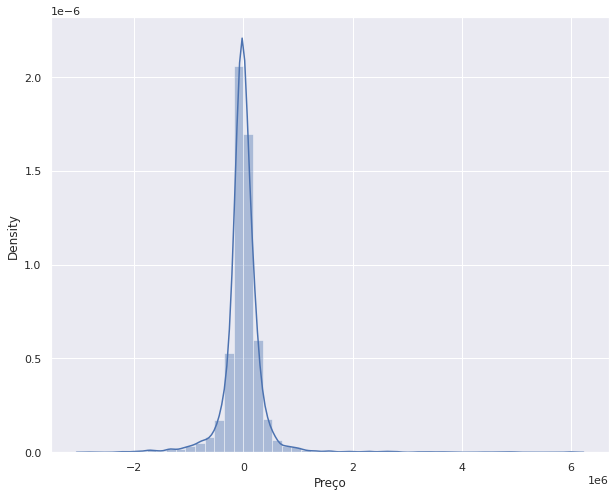

In [244]:
## Plotando o histograma dos resíduos
plt.figure(figsize=(10,8))
sns.distplot(residv)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma dos Resíduos', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax

In [245]:
y_preda = modeloa.predict(Xa)

In [246]:
resida = ya - y_preda

AttributeError: 'PairGrid' object has no attribute 'figure'

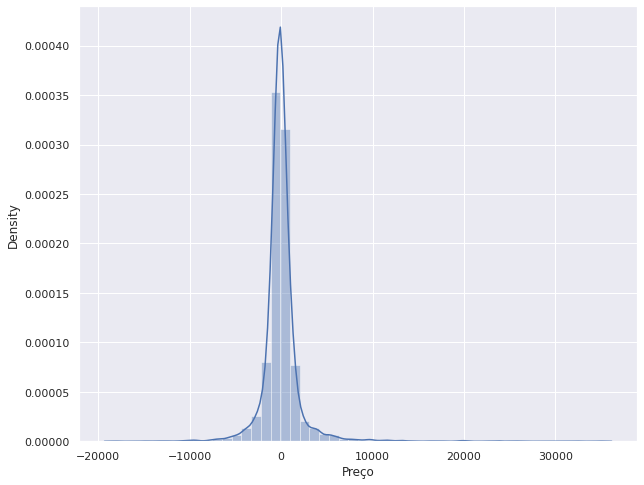

In [247]:
## Plotando o histograma dos resíduos
plt.figure(figsize=(10,8))
sns.distplot(resida)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma dos Resíduos', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax